In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
import pandas as pd

dataset = pd.read_csv('./msd/YearPredictionMSD.txt', 
                      header=None).as_matrix()

In [14]:
X_train = dataset[:463715, 1:].astype(np.float32)
y_train = np.asarray(dataset[:463715, 0])

X_test = dataset[463715:, 1:].astype(np.float32)
y_test = np.asarray(dataset[463715:, 0])

In [15]:
print("Dataset is MB:", dataset.nbytes/1E6)

del dataset

Dataset is MB: 375.17116


In [16]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_absolute_error
import time

In [17]:
regr = LinearRegression()

tic = time.clock()
regr.fit(X_train, y_train)
print("Training time [s]:", time.clock()-tic)

print("MAE train set:", mean_absolute_error(y_train, 
                                  regr.predict(X_train)))

print("MAE test set:", mean_absolute_error(y_test, 
                                  regr.predict(X_test)))

Training time [s]: 6.211522000000059
MAE train set: 6.79557143273
MAE test set: 6.8004976262


In [18]:
regr = SGDRegressor(random_state=101)

tic = time.clock()
regr.fit(X_train, y_train)
print("Training time [s]:", time.clock()-tic)

print("MAE train set:", mean_absolute_error(y_train, 
                                  regr.predict(X_train)))

print("MAE test set:", mean_absolute_error(y_test, 
                                  regr.predict(X_test)))

Training time [s]: 1.4601459999998951
MAE train set: 4.61352832373e+15
MAE test set: 4.64860022117e+15


In [19]:
regr = SGDRegressor(random_state=101, n_iter=100)

tic = time.clock()
regr.fit(X_train, y_train)
print("Training time [s]:", time.clock()-tic)

print("MAE train set:", mean_absolute_error(y_train, 
                                  regr.predict(X_train)))

print("MAE test set:", mean_absolute_error(y_test, 
                                  regr.predict(X_test)))

Training time [s]: 23.028584000000137
MAE train set: 8.12486708423e+14
MAE test set: 8.11624417368e+14


In [20]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures().fit_transform(X_train[:10,:]).shape[1]

4186

In [21]:
from sklearn.pipeline import Pipeline
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
import gc

folds = 12
train_idx = list(KFold(X_train.shape[0], folds, random_state=101, shuffle=True))[0][1]

to_plot = []


for k_feat in range(50, 2001, 50):
    
    gc.collect()
    
    print('---------------------------')
    print("K = ", k_feat)
    
    poly = PolynomialFeatures()
    regr = LinearRegression()
    f_sel = SelectKBest(feature_selection.f_regression, k=k_feat)

    pipeline = Pipeline([('poly', poly), ('f_sel', f_sel), ('regr', regr)])
    tic = time.clock()
    pipeline.fit(X_train[train_idx], y_train[train_idx])
    print("Training time [s]:", time.clock()-tic)
    
    mae_train = mean_absolute_error(y_train[train_idx], pipeline.predict(X_train[train_idx]))
    mae_test = mean_absolute_error(y_test, pipeline.predict(X_test))

    print("MAE train set:", mae_train)

    print("MAE test set:", mae_test)
    
    to_plot.append((k_feat, mae_train, mae_test))

---------------------------
K =  50
Training time [s]: 9.189624000000094
MAE train set: 7.2167947147
MAE test set: 7.17509061835
---------------------------
K =  100
Training time [s]: 9.120705000000271
MAE train set: 7.15342169823
MAE test set: 7.11426166834
---------------------------
K =  150
Training time [s]: 10.262009999999918
MAE train set: 7.06834013527
MAE test set: 7.06141525342
---------------------------
K =  200
Training time [s]: 9.969074999999975
MAE train set: 7.02144412121
MAE test set: 7.04225179913
---------------------------
K =  250
Training time [s]: 10.463522999999896
MAE train set: 6.97841358686
MAE test set: 7.0199851787
---------------------------
K =  300
Training time [s]: 10.902124000000185
MAE train set: 6.91862958298
MAE test set: 6.9704004744
---------------------------
K =  350
Training time [s]: 10.932276000000002
MAE train set: 6.88969389119
MAE test set: 6.95757659986
---------------------------
K =  400
Training time [s]: 10.988593000000037
MAE trai

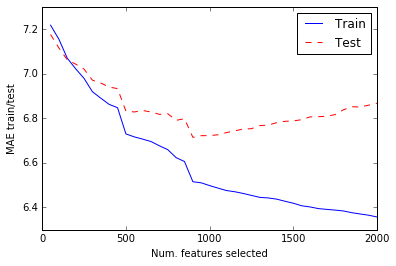

In [22]:
plt.plot([x[0] for x in to_plot], [x[1] for x in to_plot], 'b', label='Train')
plt.plot([x[0] for x in to_plot], [x[2] for x in to_plot], 'r--', label='Test')
plt.xlabel('Num. features selected')
plt.ylabel('MAE train/test')
plt.legend(loc=0)

plt.show()

## What about a classifier instead of a regressor?

In [23]:
print(np.unique(np.ascontiguousarray(y_train)))
print(len(np.unique(np.ascontiguousarray(y_train))))

[ 1922.  1924.  1925.  1926.  1927.  1928.  1929.  1930.  1931.  1932.
  1933.  1934.  1935.  1936.  1937.  1938.  1939.  1940.  1941.  1942.
  1943.  1944.  1945.  1946.  1947.  1948.  1949.  1950.  1951.  1952.
  1953.  1954.  1955.  1956.  1957.  1958.  1959.  1960.  1961.  1962.
  1963.  1964.  1965.  1966.  1967.  1968.  1969.  1970.  1971.  1972.
  1973.  1974.  1975.  1976.  1977.  1978.  1979.  1980.  1981.  1982.
  1983.  1984.  1985.  1986.  1987.  1988.  1989.  1990.  1991.  1992.
  1993.  1994.  1995.  1996.  1997.  1998.  1999.  2000.  2001.  2002.
  2003.  2004.  2005.  2006.  2007.  2008.  2009.  2010.  2011.]
89


In [24]:
from sklearn.linear_model import SGDClassifier
regr = SGDClassifier('log', random_state=101)

tic = time.clock()
regr.fit(X_train, y_train)
print("Training time [s]:", time.clock()-tic)

print("MAE train set:", mean_absolute_error(y_train, 
                                  regr.predict(X_train)))

print("MAE test set:", mean_absolute_error(y_test, 
                                  regr.predict(X_test)))

Training time [s]: 69.49637499999972
MAE train set: 8.57550866373
MAE test set: 8.52630253728
